In [1]:
import numpy as np, matplotlib.pyplot as plt
import scipy.optimize as optimize
import matplotlib as mpl
from astropy.io import ascii as asc
from scipy.optimize import curve_fit

FULL_PATH = '/Users/kaitlynshin/GoogleDrive/NASA_Summer2015/'
CUTOFF_SIGMA = 4.0
CUTOFF_MASS = 6.0

In [2]:
# reading in data generated by EBV_corrections.py
corr_tbl = asc.read(FULL_PATH+'Main_Sequence/mainseq_corrections_tbl.txt',guess=False,
                Reader=asc.FixedWidthTwoLine)
zspec0 = np.array(corr_tbl['zspec0'])

stlr_mass = np.array(corr_tbl['stlr_mass'])
filts = np.array(corr_tbl['filt'])
sfr = np.array(corr_tbl['met_dep_sfr'])
dust_corr_factor = np.array(corr_tbl['dust_corr_factor'])
filt_corr_factor = np.array(corr_tbl['filt_corr_factor'])
nii_ha_corr_factor = np.array(corr_tbl['nii_ha_corr_factor'])


# defining useful data structs for plotting
filtarr = np.array(['NB704,NB711', 'NB816', 'NB921', 'NB973'])
markarr = np.array(['o', '^', 'D', '*'])
sizearr = np.array([6.0, 6.0, 6.0, 9.0])**2

# defining an approximate redshift array for plot visualization
z_arr0 = np.array([7045.0, 7126.0, 8152.0, 9193.0, 9749.0])/6563.0 - 1
z_arr0 = np.around(z_arr0, 2)
z_arr  = np.array(z_arr0, dtype='|S9')
z_arr[0] = ",".join(z_arr[:2])
z_arr = np.delete(z_arr, 1)
z_arr  = np.array([x+'0' if len(x)==3 else x for x in z_arr])

# defining a flux sigma and mass cutoff
good_sig_iis = np.where((corr_tbl['flux_sigma'] >= CUTOFF_SIGMA) & (stlr_mass >= CUTOFF_MASS))[0]

corr_sfrs = sfr+filt_corr_factor+nii_ha_corr_factor+dust_corr_factor

In [3]:
smass0 = np.array(corr_tbl['stlr_mass'])[good_sig_iis]

zspec0 = np.array(corr_tbl['zspec0'])[good_sig_iis]
no_spectra  = np.where((zspec0 <= 0) | (zspec0 > 9))[0]
yes_spectra = np.where((zspec0 >= 0) & (zspec0 < 9))[0]

badz_iis = np.array([x for x in range(len(zspec0)) if zspec0[x] < 0 or zspec0[x] > 9])
filt_lambda_list = {'NB704':7045.0, 'NB711':7126.0, 'NB816':8152.0, 'NB921':9193.0, 'NB973':9749.0}
ffs = filts[good_sig_iis]
for ff in filt_lambda_list.keys():
    badf_match = np.where(ffs[badz_iis] == ff)[0]
    zspec0[badz_iis[badf_match]] = (filt_lambda_list[ff]/6562.8) - 1

data00 = np.vstack([smass0, zspec0]).T

sfrs00 = corr_sfrs[good_sig_iis]

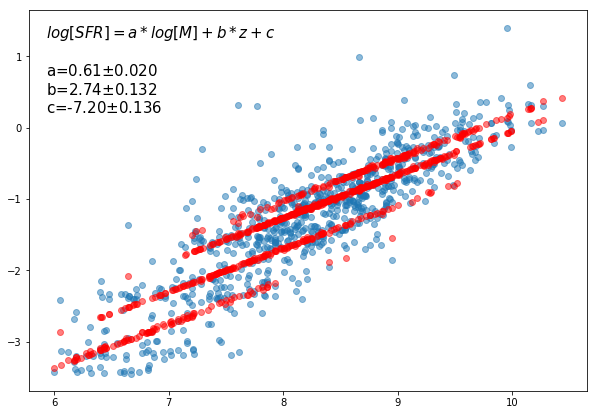

In [4]:
# assuming sfr = a*m + b*z + c
eqn0 = r'$log[SFR] = a*log[M] + b*z + c$'
def func0(data, a, b, c):
    return a*data[:,0] + b*data[:,1] + c

f, ax = plt.subplots()
params, pcov = optimize.curve_fit(func0, data00, sfrs00, method='lm')
perr = np.sqrt(np.diag(pcov))
ax.plot(smass0, sfrs00, 'o', alpha=0.5)
ax.plot(smass0, func0(data00, *params), 'ro', alpha=0.5)
ax.text(0.03,0.97,eqn0+
         '\n\na='+'{:.2f}'.format(params[0])+r'$\pm$'+'{:.3f}'.format(np.sqrt(np.diag(pcov))[0])+
         '\nb='+'{:.2f}'.format(params[1])+r'$\pm$'+'{:.3f}'.format(np.sqrt(np.diag(pcov))[1])+
         '\nc='+'{:.2f}'.format(params[2])+r'$\pm$'+'{:.3f}'.format(np.sqrt(np.diag(pcov))[2]),
         transform=ax.transAxes,fontsize=15,ha='left',va='top')

f.set_size_inches(10,7)

### plotting rms of SFR-M\* fit vs M\* in 0.5 bins

In [5]:
# defining an approximate redshift array for plot visualization
# z_arr0 = np.array([7045.0, 7126.0, 8152.0, 9193.0, 9749.0])/6563.0 - 1
# z_arr0 = np.around(z_arr0, 2)
# z_arr  = np.array(z_arr0, dtype='|S9')
# z_arr[0] = ",".join(z_arr[:2])
# z_arr = np.delete(z_arr, 1)
# z_arr  = np.array([x+'0' if len(x)==3 else x for x in z_arr])


# smass_all = np.array(corr_tbl['stlr_mass'])

# zspec_all = np.array(corr_tbl['zspec0'])
# badz_iis = np.array([x for x in range(len(zspec_all)) if zspec_all[x] < 0 or zspec_all[x] > 9])
# filt_lambda_list = {'NB704':7045.0, 'NB711':7126.0, 'NB816':8152.0, 'NB921':9193.0, 'NB973':9749.0}
# for ff in filt_lambda_list.keys():
#     badf_match = np.where(filts[badz_iis] == ff)[0]
#     zspec_all[badz_iis[badf_match]] = (filt_lambda_list[ff]/6562.8) - 1

# data_all = np.vstack([smass_all, zspec_all]).T

In [6]:
filts00 = filts[good_sig_iis]
markarr = np.array(['o', '^', 'D', '*'])
sizearr = np.array([6.0, 6.0, 6.0, 9.0])**2

mbins0 = np.arange(6.25, 10.75, .5)
bin_ii = np.digitize(smass0, mbins0)

In [7]:
len(smass0)

779

sigma = 0.2866
sigma = 0.2973
sigma = 0.3468
sigma = 0.398
sigma = 0.3268
sigma = 0.3807
sigma = 0.3479
sigma = 0.3029
sigma = 0.3207


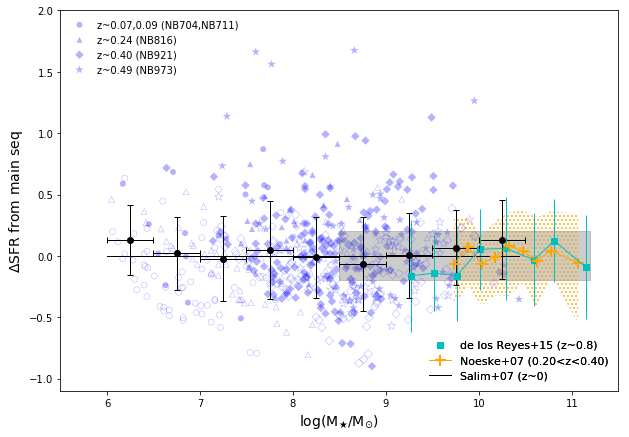

In [8]:
f, ax = plt.subplots()
params, pcov = optimize.curve_fit(func0, data00, sfrs00, method='lm')
sfrs_resid = sfrs00 - func0(data00, *params)
ax.plot(smass0, np.zeros(len(smass0)), 'k-')
for ff,mm,ll,size,avg_z in zip(['NB7', 'NB816', 'NB921', 'NB973'], markarr, 
                       ['NB704,NB711', 'NB816', 'NB921', 'NB973'], sizearr, z_arr):
    if 'NB7' in ff:
        filt_index_n = np.array([x for x in range(len(no_spectra)) if ff[:3] in filts00[no_spectra][x] 
            and no_spectra[x] in good_sig_iis])
        filt_index_y = np.array([x for x in range(len(yes_spectra)) if ff[:3] in filts00[yes_spectra][x]
            and yes_spectra[x] in good_sig_iis])
    else:
        filt_index_n = np.array([x for x in range(len(no_spectra)) if ff==filts00[no_spectra][x] 
            and no_spectra[x] in good_sig_iis])
        filt_index_y = np.array([x for x in range(len(yes_spectra)) if ff==filts00[yes_spectra][x]
            and yes_spectra[x] in good_sig_iis])


    ax.scatter(smass0[yes_spectra][filt_index_y],
               sfrs_resid[yes_spectra][filt_index_y], marker=mm,
               facecolors='blue', edgecolors='none', alpha=0.3,
               label='z~'+np.str(avg_z)+' ('+ll+')', s=size)

    ax.scatter(smass0[no_spectra][filt_index_n], 
                    sfrs_resid[no_spectra][filt_index_n],
                    marker=mm, facecolors='none', edgecolors='blue', alpha=0.3, 
                    linewidth=0.5, zorder=3, s=size)

for i in range(len(mbins0)):
    bin_match = np.where(bin_ii == i)[0]
    ax.plot(mbins0[i], np.mean(sfrs_resid[bin_match]), 'ko')
    ax.errorbar(mbins0[i], np.mean(sfrs_resid[bin_match]), xerr=0.25, yerr=np.std(sfrs_resid[bin_match]),
                capsize=3, color='k')
    print 'sigma =',str(np.round(np.std(sfrs_resid[bin_match]), 4))

# salim07
xarr = np.arange(8.5, 11.2, 0.01)
plt.fill_between(xarr, -np.array([0.2]*len(xarr)), np.array([0.2]*len(xarr)), color='gray', alpha=0.4)

# delosreyes15
def delosreyes_fit(mass):
    return 0.75*mass - 6.73
dlr_xarr = np.array([9.27, 9.52, 9.76, 10.01, 10.29, 10.59, 10.81, 11.15])
dlr_yarr = np.array([0.06, 0.27, 0.43, 0.83, 1.05, 1.18, 1.50, 1.54])
dlr_yerr = np.array([0.454, 0.313, 0.373, 0.329, 0.419, 0.379, 0.337, 0.424])
ax.errorbar(dlr_xarr, dlr_yarr - delosreyes_fit(dlr_xarr), dlr_yerr, fmt='c', ecolor='c', zorder=2) 
ax.scatter(dlr_xarr, dlr_yarr - delosreyes_fit(dlr_xarr), color='c', marker='s', zorder=2)

# noeske07
# def noeske_fit(mass):
#     return 0.67*mass - 6.19
def line(mass, a, b):
    return a*mass + b
noeske = asc.read(FULL_PATH+'Main_Sequence/Noeske07_fig1_z1.txt',guess=False,
                  Reader=asc.NoHeader)
logM   = np.array(noeske['col1'])
logSFR = np.array(noeske['col2'])
logSFR_low  = np.array(noeske['col3'])
logSFR_high = np.array(noeske['col4'])
params, pcov = curve_fit(line, logM, logSFR)
ax.fill_between(logM, logSFR_low-line(logM, *params), logSFR_high-line(logM, *params), facecolor='none',
                hatch=3*'.', edgecolor='orange', linewidth=0.0, zorder=1)
ax.plot(logM, logSFR - line(logM, *params), color='orange', marker='+', #linestyle='', 
        mew=2, markersize=11)

# first legend
legend1 = ax.legend(loc='upper left', frameon=False)
ax.add_artist(legend1)

# second legend
noeske, = ax.plot(-100,100,color='orange', marker='+',label='Noeske+07 (0.20<z<0.40)',mew=2,markersize=11)
delosreyes = ax.scatter(-100, 100, color='c', marker='s',label='de los Reyes+15 (z~0.8)', zorder=2)
salim, = ax.plot([-100, 100], [-100, 100], 'k-', label='Salim+07 (z~0)', zorder=1)
labelarr2 = np.array([delosreyes, noeske, salim])
legend2 = ax.legend(handles=list(labelarr2), loc='lower right', frameon=False,
                     fontsize=11, scatterpoints=1, numpoints=1)
ax.add_artist(legend2)

# final touches
ax.set_xlabel('log(M'+r'$_\bigstar$'+'/M'+r'$_{\odot}$'+')', size=14)
ax.set_ylabel(r'$\Delta$'+'SFR from main seq', size=14)
ax.set_xlim([5.5,11.5])
ax.set_ylim([-1.1,2.0])
f.set_size_inches(10,7)

In [9]:
corr_tbl[good_sig_iis][np.where(bin_ii==0)[0]]

ID,NAME0,filt,inst_str0,zspec0,stlr_mass,flux_sigma,obs_fluxes,obs_lumin,obs_sfr,met_dep_sfr,filt_corr_factor,nii_ha_corr_factor,NII_Ha_ratio,ratio_vs_line,A(Ha),EBV,dust_corr_factor,EBV_errs,dust_errs,NBIA_errs,meas_errs
int64,str51,str5,str13,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str5,float64,float64,float64,float64,float64,float64,float64
62,Ha-NB704_006787,NB704,N/A,-10.0,6.23,4.45196589186,-17.0918750763,38.0286491861,-3.3289962277,-3.48574612455,0.110400836647,-0.026461228603,0.0628236960492,line,0.0,0.0,0.0,0.00688792820104,0.00698439941344,0.354473221356,0.250699069099
81,Ha-NB704_007095,NB704,"MMT,",9.9999,6.0,4.15703650496,-17.1216430664,37.998881196,-3.35876421781,-3.51551411467,0.110400836647,-0.026461228603,0.0628236960492,line,0.0,0.0,0.0,0.00688792820104,0.00698439941344,0.302242368827,0.213774684364
421,Ha-NB704_025328,NB704,"MMT,",9.9999,6.06,8.3021993112,-16.8212337494,38.299290513,-3.0583549008,-3.21510479765,0.110400836647,-0.026461228603,0.0628236960492,line,0.0,0.0,0.0,0.00688792820104,0.00698439941344,0.180626364178,0.127817575614
596,Ha-NB704_040704,NB704,N/A,-10.0,6.2,4.25654097095,-17.1113700867,38.0091541757,-3.34849123808,-3.50524113493,0.110400836647,-0.026461228603,0.0628236960492,line,0.0,0.0,0.0,0.00688792820104,0.00698439941344,0.320507441059,0.226686790098
798,Ha-NB704_059858,NB704,N/A,-10.0,6.18,4.67065907588,-17.0710487366,38.0494755258,-3.30816988798,-3.46491978483,0.110400836647,-0.026461228603,0.0628236960492,line,0.0,0.0,0.0,0.00688792820104,0.00698439941344,0.33792698566,0.239001495259
1222,Ha-NB704_106242,NB704,"MMT,",0.0677,6.17,23.099243519,-16.3768291473,38.6690889717,-2.68855644214,-2.84530633899,0.154078925549,-0.026461228603,0.0628236960492,line,0.0682425393923,0.026919978871,0.0272970157569,0.0733535978498,0.0743809765204,0.0590250710972,0.0671434609108
1341,Ha-NB704_118668,NB704,N/A,-10.0,6.17,5.81675470624,-16.9757461548,38.1447781076,-3.21286730619,-3.36961720304,0.110400836647,-0.026461228603,0.0628236960492,line,0.0,0.0,0.0,0.00688792820104,0.00698439941344,0.265255379822,0.187628886848
1720,Ha-NB711_005898,NB711,N/A,-10.0,6.12,4.60059498028,-17.0147361755,38.2480589273,-3.10958648651,-3.26633638336,0.149287973383,-0.026461228603,0.0628236960492,line,0.0,0.0,0.0,0.00688792820104,0.00698439941344,0.35234709801,0.249195966371
2121,Ha-NB711_032889,NB711,"MMT,",-1.0,6.19,16.6671636714,-16.4556884766,38.8071066263,-2.55053878754,-2.70728868439,0.149287973383,-0.026461228603,0.0628236960492,line,0.0,0.0,0.0,0.00688792820104,0.00698439941344,0.0835163191232,0.0592611061112


In [10]:
np.mean(corr_tbl[good_sig_iis][np.where(bin_ii==0)[0]]['meas_errs'])

0.19230356649900002

In [11]:
intr = []
for i in range(len(mbins0)):
    bin_match = np.where(bin_ii == i)[0]
    print 'mass range:', mbins0[i]-0.25, '--', mbins0[i]+0.25
    
    plot_dispersion = np.std(sfrs_resid[bin_match])
    print 'observed_sigma =',str(np.round(plot_dispersion,4)) #'plot_sigma'
    
    meas_dispersion = np.mean(corr_tbl[good_sig_iis]['meas_errs'][bin_match].data)
    print 'systematic_sigma =',str(np.round(meas_dispersion, 4)) #'measured_sigma'
    
    intr_dispersion = np.sqrt(plot_dispersion**2 - meas_dispersion**2)
    intr.append(intr_dispersion)
    print 'intrinsic_sigma =',str(np.round(intr_dispersion, 4)), '\n'

mass range: 6.0 -- 6.5
observed_sigma = 0.2866
systematic_sigma = 0.1923
intrinsic_sigma = 0.2125 

mass range: 6.5 -- 7.0
observed_sigma = 0.2973
systematic_sigma = 0.1785
intrinsic_sigma = 0.2377 

mass range: 7.0 -- 7.5
observed_sigma = 0.3468
systematic_sigma = 0.1398
intrinsic_sigma = 0.3174 

mass range: 7.5 -- 8.0
observed_sigma = 0.398
systematic_sigma = 0.1394
intrinsic_sigma = 0.3728 

mass range: 8.0 -- 8.5
observed_sigma = 0.3268
systematic_sigma = 0.1269
intrinsic_sigma = 0.3012 

mass range: 8.5 -- 9.0
observed_sigma = 0.3807
systematic_sigma = 0.0901
intrinsic_sigma = 0.3698 

mass range: 9.0 -- 9.5
observed_sigma = 0.3479
systematic_sigma = 0.0521
intrinsic_sigma = 0.344 

mass range: 9.5 -- 10.0
observed_sigma = 0.3029
systematic_sigma = 0.0263
intrinsic_sigma = 0.3017 

mass range: 10.0 -- 10.5
observed_sigma = 0.3207
systematic_sigma = 0.0231
intrinsic_sigma = 0.3199 



Text(0.5,1,'intrinsic dispersion')

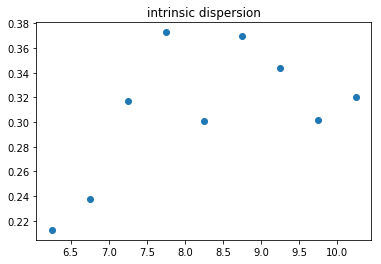

In [12]:
plt.plot(mbins0, intr, 'o', label='both')
plt.title('intrinsic dispersion')

In [13]:
np.mean(intr[2:])

0.33241136600894094

$log[SFR] = a*log[M] + b*z + c$


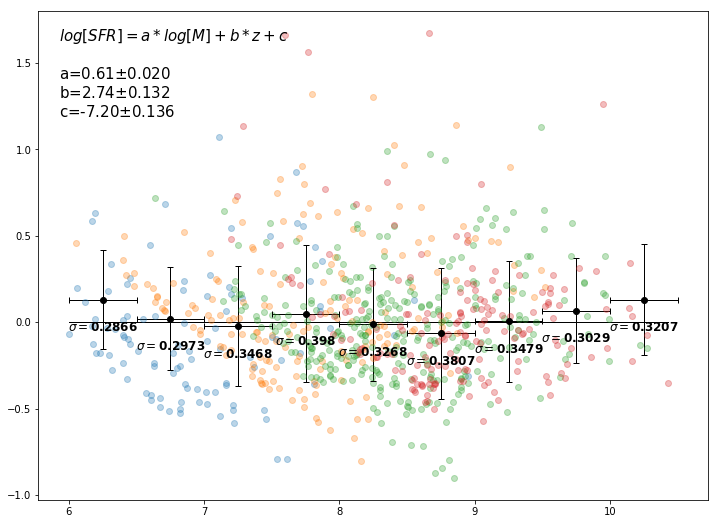

In [14]:
cwheel = [np.array(mpl.rcParams['axes.prop_cycle'])[x]['color'] for x in range(4)]
f, ax = plt.subplots(1,1)

guess = (0.8,1, -7)
func = func0
eqn_str = eqn0

print eqn_str
ax.plot(smass0, np.zeros(len(smass0)), 'k-')

sfrs_plot = np.array([])

params, pcov = optimize.curve_fit(func, data00, sfrs00, guess, method='trf')
perr = np.sqrt(np.diag(pcov))
sfrs_plot = sfrs00 - func(data00, *params)
ax.text(0.03,0.97,eqn_str+
    '\n\na='+'{:.2f}'.format(params[0])+r'$\pm$'+'{:.3f}'.format(np.sqrt(np.diag(pcov))[0])+
    '\nb='+'{:.2f}'.format(params[1])+r'$\pm$'+'{:.3f}'.format(np.sqrt(np.diag(pcov))[1])+
    '\nc='+'{:.2f}'.format(params[2])+r'$\pm$'+'{:.3f}'.format(np.sqrt(np.diag(pcov))[2]),
    transform=ax.transAxes,fontsize=15,ha='left',va='top')

    #     ax.plot(smass0, sfrs_plot, 'o', alpha=0.5)
for ff,cc,ll in zip(['NB7', 'NB816', 'NB921', 'NB973'], cwheel, ['NB704,NB711', 'NB816', 'NB921', 'NB973']):
    filt_match = np.array([x for x in range(len(filts00)) if ff in filts00[x]])
    ax.plot(smass0[filt_match], sfrs_plot[filt_match], 'o', color=cc, alpha=0.3, label=ll)

#     plt.xlabel('M')
#     plt.ylabel('sigma_rms')
#     plt.legend(loc='best')

for i in range(len(mbins0)):
    bin_match = np.where(bin_ii == i)[0]
    ax.plot(mbins0[i], np.mean(sfrs_plot[bin_match]), 'ko')
    ax.errorbar(mbins0[i], np.mean(sfrs_plot[bin_match]), xerr=0.25, yerr=np.std(sfrs_plot[bin_match]),
                capsize=3, color='k')
    ax.annotate(r'$\sigma=$'+str(np.round(np.std(sfrs_plot[bin_match]), 4)), 
                (mbins0[i], np.mean(sfrs_plot[bin_match])-0.2), 
                va='bottom', ha='center', fontsize=12, color='k', fontweight='bold')
#         print 'bin dispersion:', mbins[i], '|', np.std(sfrs_plot[bin_match])

f.set_size_inches(12,9)
# f.tight_layout()

[ 0.7073785  -7.76075851]


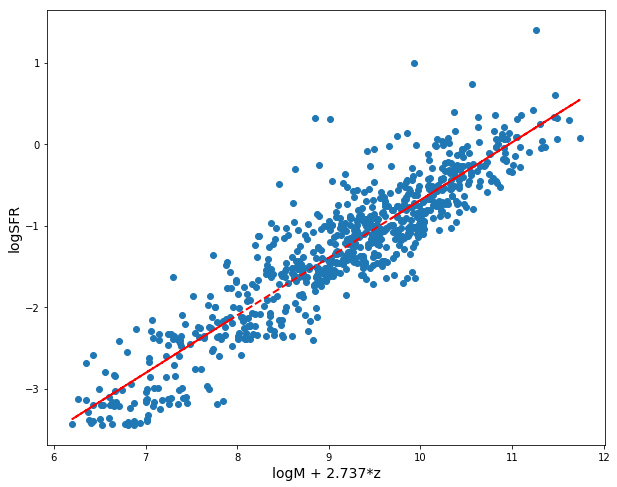

In [15]:
xaxis_with_z = smass0 + params[1]*zspec0
plt.plot(xaxis_with_z, sfrs00, 'o')
params_z,pcov_z = curve_fit(line, xaxis_with_z, sfrs00)
print params_z

plt.plot(xaxis_with_z, line(xaxis_with_z, *params_z), 'r--', lw=2)
# plt.text(3.5,1.3,'slope = '+'%.3f'%params_z[1], fontsize=15)
plt.xlabel('logM + '+'%.3f'%params[1]+'*z', size=14)
plt.ylabel('logSFR', size=14)

plt.gcf().set_size_inches(10,8)

### plotting rms of SFR-M\* fit vs SFR

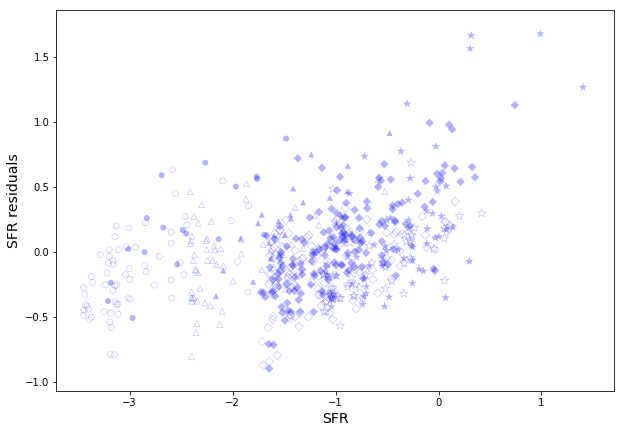

In [16]:
f, ax = plt.subplots()

for ff,mm,ll,size,avg_z in zip(['NB7', 'NB816', 'NB921', 'NB973'], markarr, 
                       ['NB704,NB711', 'NB816', 'NB921', 'NB973'], sizearr, z_arr):
    if 'NB7' in ff:
        filt_index_n = np.array([x for x in range(len(no_spectra)) if ff[:3] in filts00[no_spectra][x] 
            and no_spectra[x] in good_sig_iis])
        filt_index_y = np.array([x for x in range(len(yes_spectra)) if ff[:3] in filts00[yes_spectra][x]
            and yes_spectra[x] in good_sig_iis])
    else:
        filt_index_n = np.array([x for x in range(len(no_spectra)) if ff==filts00[no_spectra][x] 
            and no_spectra[x] in good_sig_iis])
        filt_index_y = np.array([x for x in range(len(yes_spectra)) if ff==filts00[yes_spectra][x]
            and yes_spectra[x] in good_sig_iis])
    
    ax.scatter(corr_sfrs[good_sig_iis][yes_spectra][filt_index_y],
               sfrs_resid[yes_spectra][filt_index_y], marker=mm,
               facecolors='blue', edgecolors='none', alpha=0.3,
               label='z~'+np.str(avg_z)+' ('+ll+')', s=size)

    ax.scatter(corr_sfrs[good_sig_iis][no_spectra][filt_index_n], 
                    sfrs_resid[no_spectra][filt_index_n],
                    marker=mm, facecolors='none', edgecolors='blue', alpha=0.3, 
                    linewidth=0.5, zorder=3, s=size)

# final touches
ax.set_xlabel('SFR', size=14)
ax.set_ylabel('SFR residuals', size=14)
f.set_size_inches(10,7)

## plotting sSFR vs. m*

Text(0,0.5,'sSFR')

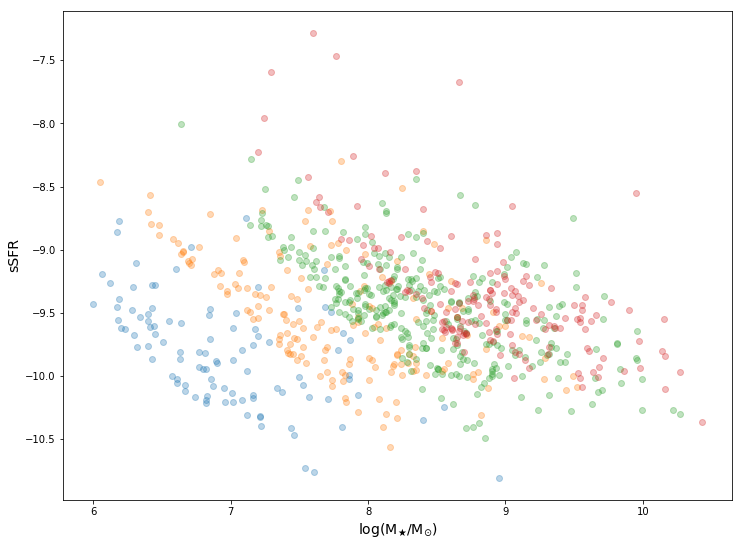

In [17]:
cwheel = [np.array(mpl.rcParams['axes.prop_cycle'])[x]['color'] for x in range(4)]
f, ax = plt.subplots(1,1)

ssfr = sfrs00-smass0
for ff,cc,ll in zip(['NB7', 'NB816', 'NB921', 'NB973'], cwheel, ['NB704,NB711', 'NB816', 'NB921', 'NB973']):
    filt_match = np.array([x for x in range(len(filts00)) if ff in filts00[x]])
    ax.plot(smass0[filt_match], ssfr[filt_match], 'o', color=cc, alpha=0.3, label=ll)

f.set_size_inches(12,9)
ax.set_xlabel('log(M'+r'$_\bigstar$'+'/M'+r'$_{\odot}$'+')', size=14)
ax.set_ylabel(r'sSFR', size=14)